In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("covid-19-data/us-counties.csv")
cook_counties = df[((df["county"]=="Cook") & (df["state"]=="Illinois"))]

In [3]:
cook_counties

,date,county,state,fips,cases,deaths
3,2020-01-24,Cook,Illinois,17031.0,1,0
6,2020-01-25,Cook,Illinois,17031.0,1,0
11,2020-01-26,Cook,Illinois,17031.0,1,0
16,2020-01-27,Cook,Illinois,17031.0,1,0
21,2020-01-28,Cook,Illinois,17031.0,1,0
...,...,...,...,...,...,...
548037,2020-09-19,Cook,Illinois,17031.0,138576,5157
551276,2020-09-20,Cook,Illinois,17031.0,139088,5162
554515,2020-09-21,Cook,Illinois,17031.0,139597,5167
557752,2020-09-22,Cook,Illinois,17031.0,140078,5172


In [4]:
# Get the daily death count
for index in range(len(cook_counties)):
    _id = cook_counties.iloc[index].name
    if index == 0:
        cook_counties.loc[_id, "daily_deaths"] = cook_counties.loc[_id, "deaths"]
    else:
        cook_counties.loc[_id, "daily_deaths"] = cook_counties.loc[_id, "deaths"] - prev_count  # compute the dif between today's total # of deaths and yesterday's
    
    prev_count = cook_counties.loc[_id, "deaths"]

/home/luis/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/luis/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [5]:
# Get the daily case count
for index in range(len(cook_counties)):
    _id = cook_counties.iloc[index].name
    if index == 0:
        cook_counties.loc[_id, "daily_cases"] = cook_counties.loc[_id, "cases"]
    else:
        cook_counties.loc[_id, "daily_cases"] = cook_counties.loc[_id, "cases"] - prev_count  # compute the dif between today's total # of deaths and yesterday's
    
    prev_count = cook_counties.loc[_id, "cases"]

In [6]:
last_60 = cook_counties.tail(60)

In [7]:
last_60

,date,county,state,fips,cases,deaths,daily_deaths,daily_cases
370525,2020-07-26,Cook,Illinois,17031.0,102583,4830,1.0,628.0
373737,2020-07-27,Cook,Illinois,17031.0,103008,4845,15.0,425.0
376952,2020-07-28,Cook,Illinois,17031.0,103441,4857,12.0,433.0
380169,2020-07-29,Cook,Illinois,17031.0,104001,4864,7.0,560.0
383386,2020-07-30,Cook,Illinois,17031.0,104691,4872,8.0,690.0
386604,2020-07-31,Cook,Illinois,17031.0,105493,4886,14.0,802.0
389821,2020-08-01,Cook,Illinois,17031.0,106131,4888,2.0,638.0
393038,2020-08-02,Cook,Illinois,17031.0,106713,4894,6.0,582.0
396254,2020-08-03,Cook,Illinois,17031.0,107247,4897,3.0,534.0
399470,2020-08-04,Cook,Illinois,17031.0,107744,4902,5.0,497.0


In [8]:
past_30 = cook_counties.tail(30)
past_30

,date,county,state,fips,cases,deaths,daily_deaths,daily_cases
467179,2020-08-25,Cook,Illinois,17031.0,122423,5022,7.0,529.0
470408,2020-08-26,Cook,Illinois,17031.0,123172,5031,9.0,749.0
473640,2020-08-27,Cook,Illinois,17031.0,123691,5039,8.0,519.0
476873,2020-08-28,Cook,Illinois,17031.0,124573,5045,6.0,882.0
480106,2020-08-29,Cook,Illinois,17031.0,125124,5046,1.0,551.0
483340,2020-08-30,Cook,Illinois,17031.0,126003,5054,8.0,879.0
486575,2020-08-31,Cook,Illinois,17031.0,126577,5058,4.0,574.0
489808,2020-09-01,Cook,Illinois,17031.0,126992,5069,11.0,415.0
493041,2020-09-02,Cook,Illinois,17031.0,127616,5073,4.0,624.0
496275,2020-09-03,Cook,Illinois,17031.0,128012,5080,7.0,396.0


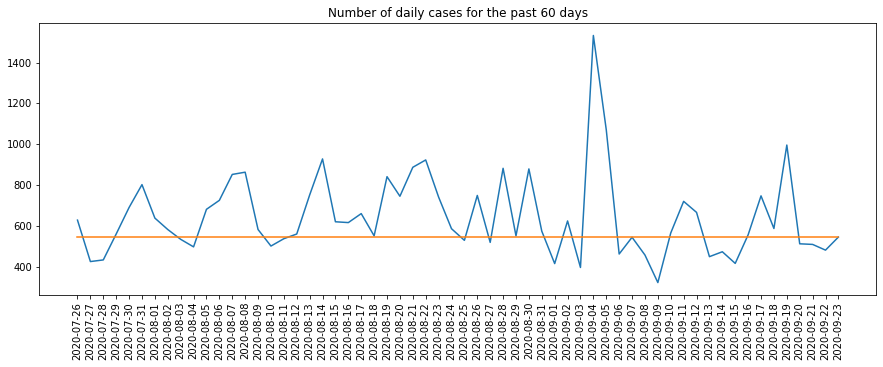

In [9]:
fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(111)
plt.xticks(rotation="90")
plt.title("Number of daily cases for the past 60 days")
ax.plot(last_60["date"], last_60["daily_cases"])
x = [last_60["date"].head(1).values[0], last_60["date"].tail(1).values[0]]
y = [last_60["daily_cases"].tail(1).values[0], last_60["daily_cases"].tail(1).values[0]]
ax.plot(x,y)

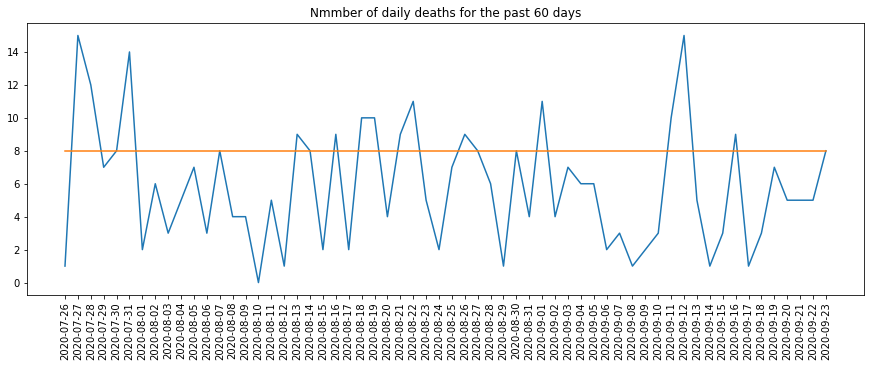

In [10]:
fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(111)
plt.xticks(rotation="90")
plt.title("Nmmber of daily deaths for the past 60 days")
ax.plot(last_60["date"], last_60["daily_deaths"])
x = [last_60["date"].head(1).values[0], last_60["date"].tail(1).values[0]]
y = [last_60["daily_deaths"].tail(1).values[0], last_60["daily_deaths"].tail(1).values[0]]
ax.plot(x,y)

In [11]:
print("Number of daily cases for the past two weeks: \n")
print(last_60["daily_cases"].tail(14).values)

Number of daily cases for the past two weeks: 

[565. 720. 666. 449. 473. 416. 556. 747. 587. 996. 512. 509. 481. 545.]


In [12]:
print("Number of deaths for the past two weeks: \n")
print(last_60["daily_deaths"].tail(14).values)

Number of deaths for the past two weeks: 

[ 3. 10. 15.  5.  1.  3.  9.  1.  3.  7.  5.  5.  5.  8.]
